In [ ]:
#import necessary modules

import pandas as pd
import numpy as np
import tensorflow as tF
import matplotlib.pyplot as plt
import os

C:/Users/RUKMANANDA REDDY/OneDrive/Desktop/lungcolon/colonca5.jpeg


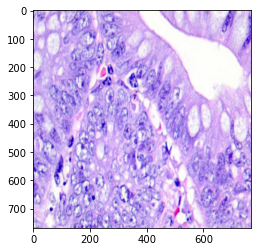

In [93]:
#checking the image

SAMPLE = "C:/Users/RUKMANANDA REDDY/OneDrive/Desktop/lungcolon/colonca5.jpeg"
plt.imshow(image.load_img(SAMPLE))
print(SAMPLE)

In [105]:
import PIL.Image as Image
x=Image.open("C:/Users/RUKMANANDA REDDY/OneDrive/Desktop/lungcolon/colonca5.jpeg")
x=np.array(x)/255.0
x.shape

(768, 768, 3)

In [106]:
x

array([[[0.77254902, 0.74509804, 0.90980392],
        [0.79607843, 0.76078431, 0.94509804],
        [0.81960784, 0.78039216, 0.98431373],
        ...,
        [0.77254902, 0.69019608, 0.94509804],
        [0.74901961, 0.66666667, 0.92156863],
        [0.72941176, 0.64705882, 0.90196078]],

       [[0.75294118, 0.7254902 , 0.89019608],
        [0.77647059, 0.74117647, 0.9254902 ],
        [0.80392157, 0.76470588, 0.96862745],
        ...,
        [0.76862745, 0.68627451, 0.94901961],
        [0.74901961, 0.66666667, 0.92941176],
        [0.7254902 , 0.64313725, 0.90588235]],

       [[0.72156863, 0.69411765, 0.85882353],
        [0.74509804, 0.71764706, 0.89019608],
        [0.78039216, 0.74117647, 0.94509804],
        ...,
        [0.76862745, 0.68627451, 0.95686275],
        [0.74901961, 0.66666667, 0.9372549 ],
        [0.72156863, 0.63921569, 0.90196078]],

       ...,

       [[0.79215686, 0.67058824, 0.96862745],
        [0.80392157, 0.68627451, 0.96078431],
        [0.79215686, 0

In [108]:
x[np.newaxis, ...]

array([[[[0.77254902, 0.74509804, 0.90980392],
         [0.79607843, 0.76078431, 0.94509804],
         [0.81960784, 0.78039216, 0.98431373],
         ...,
         [0.77254902, 0.69019608, 0.94509804],
         [0.74901961, 0.66666667, 0.92156863],
         [0.72941176, 0.64705882, 0.90196078]],

        [[0.75294118, 0.7254902 , 0.89019608],
         [0.77647059, 0.74117647, 0.9254902 ],
         [0.80392157, 0.76470588, 0.96862745],
         ...,
         [0.76862745, 0.68627451, 0.94901961],
         [0.74901961, 0.66666667, 0.92941176],
         [0.7254902 , 0.64313725, 0.90588235]],

        [[0.72156863, 0.69411765, 0.85882353],
         [0.74509804, 0.71764706, 0.89019608],
         [0.78039216, 0.74117647, 0.94509804],
         ...,
         [0.76862745, 0.68627451, 0.95686275],
         [0.74901961, 0.66666667, 0.9372549 ],
         [0.72156863, 0.63921569, 0.90196078]],

        ...,

        [[0.79215686, 0.67058824, 0.96862745],
         [0.80392157, 0.68627451, 0.96078431]

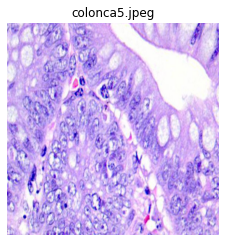

In [37]:
#ignore this code ------- just checked this code on multiple images first but later changed

from tensorflow.keras.preprocessing import image
plt.figure(figsize=(22, 8)) 
global c
c = 0

for i in SAMPLES:
    plt.subplot(1, 5, c + 1)
    c += 1
    t = i.split('/')
    plt.title(t[6])
    plt.imshow(image.load_img(i))
    plt.axis('off')
plt.show()

In [38]:
#training dataset

from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_dir = "C:/Users/RUKMANANDA REDDY/OneDrive/Desktop/colon/lung_colon_image_set/colon_image_sets"

data = ImageDataGenerator(validation_split = 0.2)

BATCH_SIZE = 128

X = Y = 224

train_ds = data.flow_from_directory(data_dir,
                                   class_mode = "categorical",
                                   target_size = (X,Y),
                                   color_mode = "rgb",
                                   batch_size = BATCH_SIZE,
                                   shuffle = False,
                                   subset = "training",
                                   seed = 42)

Found 8000 images belonging to 2 classes.


In [39]:
#validation datset

validation_ds = data.flow_from_directory(data_dir,
                                   class_mode = "categorical",
                                   target_size = (X,Y),
                                   color_mode = "rgb",
                                   batch_size = BATCH_SIZE,
                                   shuffle = False,
                                   subset = "validation",
                                   seed = 42)

Found 2000 images belonging to 2 classes.


In [40]:
#training the model

from tensorflow.keras.applications.efficientnet import EfficientNetB7 as PretrainedModel, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Flatten, Dense, Input
ptm = PretrainedModel(input_shape = (X, Y, 3),
                     weights = 'imagenet',
                     include_top = False)

ptm.trainable = False

x = GlobalAveragePooling2D()(ptm.output)
x=Flatten()(x)
x=Dense(128,activation='relu')(x)
x=Dense(64,activation='relu')(x)

y=Dense(2,activation='softmax')(x)

model=Model(inputs=ptm.input,outputs=y)

In [41]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [42]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_3 (Rescaling)        (None, 224, 224, 3)  0           ['input_4[0][0]']                
                                                                                                  
 normalization_3 (Normalization  (None, 224, 224, 3)  7          ['rescaling_3[0][0]']            
 )                                                                                                
                                                                                            

 block5g_add (Add)              (None, 14, 14, 224)  0           ['block5g_drop[0][0]',           
                                                                  'block5f_add[0][0]']            
                                                                                                  
 block5h_expand_conv (Conv2D)   (None, 14, 14, 1344  301056      ['block5g_add[0][0]']            
                                )                                                                 
                                                                                                  
 block5h_expand_bn (BatchNormal  (None, 14, 14, 1344  5376       ['block5h_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block5h_expand_activation (Act  (None, 14, 14, 1344  0          ['block5h_expand_bn[0][0]']      
 ivation) 

In [43]:
from tensorflow.keras.utils import to_categorical, plot_model
plot_model(model, to_file='NN-mnist.png', show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [44]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 3)

history = model.fit(train_ds, 
                   validation_data = validation_ds,
                   epochs = 1,
                   callbacks = [early_stopping])

63/63 [==============================] - 6650s 106s/step - loss: 0.2829 - accuracy: 0.8947 - val_loss: 0.0589 - val_accuracy: 0.9800


In [63]:
from sklearn.metrics import classification_report

Y_pred = model.predict(validation_ds)

y_pred=np.argmax(Y_pred,axis=1)

print(classification_report(validation_ds.classes,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1000
           1       0.97      0.99      0.98      1000

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



[[968  32]
 [  8 992]]


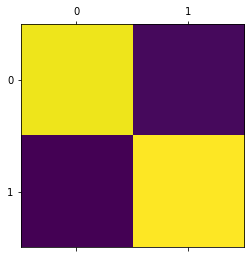

In [64]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(validation_ds.classes, y_pred)
print(cnf_matrix)
plt.matshow(cnf_matrix)

In [109]:
train_ds[0]

(array([[[[154., 147., 188.],
          [229., 214., 255.],
          [247., 237., 228.],
          ...,
          [178., 163., 232.],
          [184., 168., 243.],
          [127., 107., 192.]],
 
         [[220., 202., 200.],
          [223., 195., 217.],
          [194., 161., 208.],
          ...,
          [207., 199., 250.],
          [141., 128., 207.],
          [114.,  94., 217.]],
 
         [[147., 110., 151.],
          [125.,  74., 195.],
          [105.,  58., 162.],
          ...,
          [197., 192., 232.],
          [153., 145., 218.],
          [118., 103., 232.]],
 
         ...,
 
         [[217., 187., 247.],
          [183., 142., 218.],
          [177., 149., 226.],
          ...,
          [226., 193., 248.],
          [217., 183., 233.],
          [222., 194., 232.]],
 
         [[224., 209., 250.],
          [203., 159., 236.],
          [177., 153., 239.],
          ...,
          [208., 181., 236.],
          [211., 180., 250.],
          [177., 149., 200.

In [172]:
#predicting the image

import PIL.Image as Image
IMAGE_SHAPE = (224,224)
x=Image.open("C:/Users/RUKMANANDA REDDY/OneDrive/Desktop/lungcolon/colonca10.jpeg").resize(IMAGE_SHAPE)
x=np.array(x)
x.shape
x[np.newaxis, ...].shape
result=model.predict(x[np.newaxis, ...])
result

array([[0.5203489 , 0.47965115]], dtype=float32)

In [173]:
p=np.argmax(result)
p

0

In [ ]:
#here 0 means adinocarcinoma, 1 means no cancer